# Data visualization with `ggplot2` and `altair`

In [17]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
%%R
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

In [19]:
%%R
library(ggplot2)

In [20]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Learning Objectives

* Understand the "grammar of graphics"
* Produce scatter plots, boxplots, bar graphs, and time series plots using ggplot.
* Set universal plot settings.
* Modify the aesthetics of an existing ggplot plot (including axis labels and color).
* Build complex and customized plots from data in a data frame.

We start by loading the required packages. **`ggplot2`** is included in the **`tidyverse`** package,  and is the current standard for data visualization in R.  Authored by Hadley Wickham, `gg` stands for "Grammar of Graphics."  In learning `ggplot2`, you may find the following [cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) to be a helpful reference.

## Overview

In [21]:
%%R
dfR <- data.frame(A = c(2,1,4,9),
                 B  = c(4,1,15,80),
                 C = c(1,2,3,4),
                 D = c('far','far','near','near'))
head(dfR)

  A  B C    D
1 2  4 1  far
2 1  1 2  far
3 4 15 3 near
4 9 80 4 near


In [22]:
dfpy = pd.DataFrame({'A':[2,1,4,9],
                     'B':[4,1,15,80],
                     'C':[1,2,3,4],
                     'D':['far','far','near','near']})
dfpy.head()

,A,B,C,D
0,2,4,1,far
1,1,1,2,far
2,4,15,3,near
3,9,80,4,near


### The Grammar of Graphics

<img src="./img/what_is_data_viz.png" width=600>

## Geometries/Marks

<img src="./img/geoms.png" width=600>

## Aesthetic Mappings/Encodings

<img src="./img/aesthetics.png" width=600>

## The Anatomy of a `ggplot2` Visualization

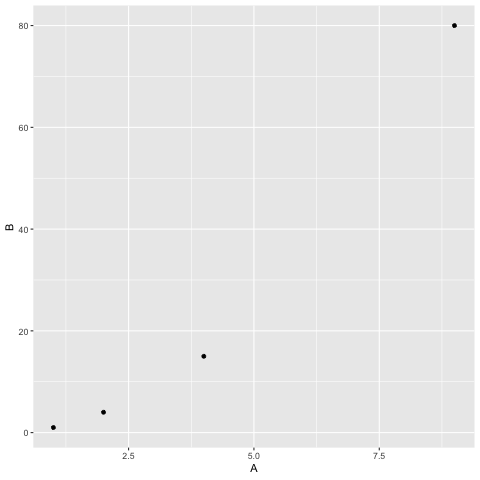

In [24]:
%%R
(ggplot(dfR)
 + geom_point(
     aes(x = A,
         y = B)))

## The Anatomy of a `altair` Visualization

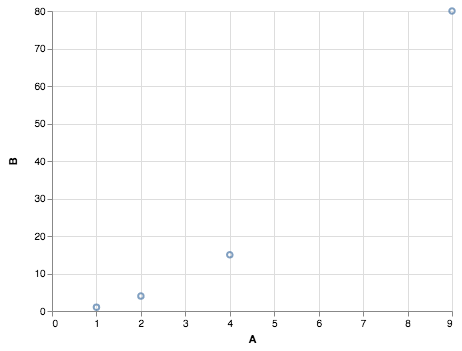

In [25]:
(alt.Chart(dfpy) 
 .mark_point()
 .encode(x = 'A',
         y = 'B'))

## Comparing `ggplot2` and `altair`

<img src="./img/ggplot_altair.png" width=600>

#### Example 2

In [26]:
%R dfR2 <- data.frame(x = 1:5 , y = 1:25, z = 1:25)
dfpy2 = pd.DataFrame({'x':5*list(range(1,6)), 
                      'y':list(range(1,26)), 
                      'z':list(range(1,26))})

#### Mapping continuous C with size:

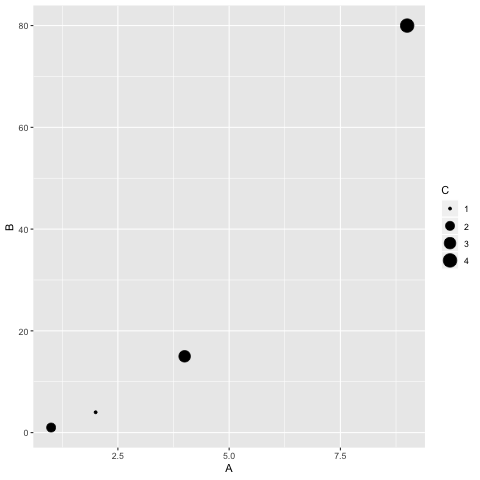

In [27]:
%%R
(ggplot(dfR) 
 +geom_point(aes(x = A,
                 y = B , 
                 size = C)))

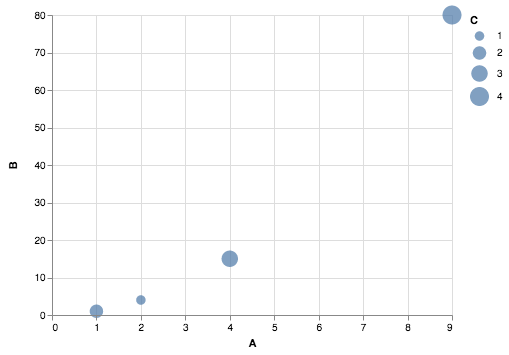

In [28]:
(alt.Chart(dfpy) 
 .mark_point(filled=True)
 .encode(x = 'A',
         y = 'B' , 
         size = 'C'))

#### Mapping continuous C with size and color:

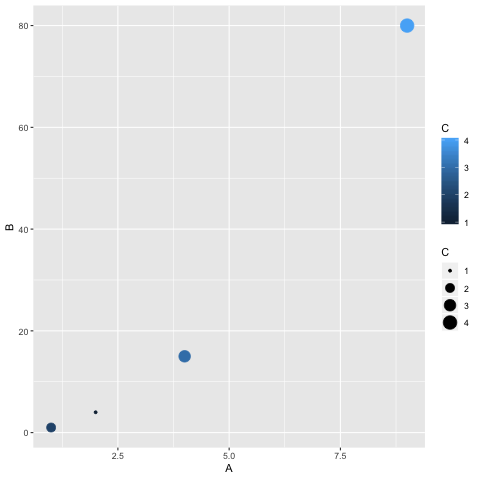

In [29]:
%%R
(ggplot(dfR) 
 +geom_point(aes(x = A,
                 y = B , 
                 size = C,
                 color = C)))

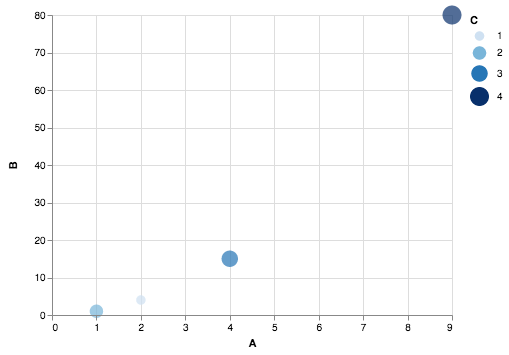

In [30]:
(alt.Chart(dfpy) 
 .mark_point(filled=True)
 .encode(x = 'A',
         y = 'B' , 
         size = 'C',
         color = 'C'))

#### Mapping continuous C with shape:

In [31]:
%%R
(ggplot(dfR) 
 +geom_point(aes(x = A,
                 y = B , 
                 shape = C)))

R[write to console]: Error: A continuous variable can not be mapped to shape



RRuntimeError: Error: A continuous variable can not be mapped to shape


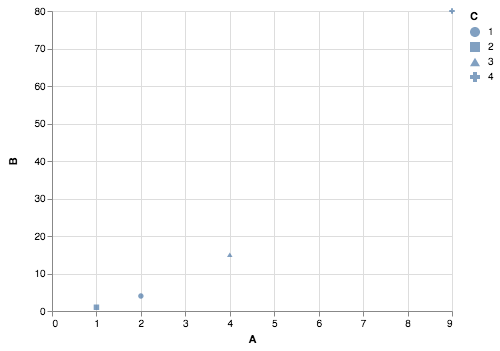

In [32]:
(alt.Chart(dfpy) 
 .mark_point(filled=True)
 .encode(x = 'A',
         y = 'B' , 
         shape = 'C'))

## <font color="red"> Challenge </font>

Re-create the following plots:

#### Plot 1

<img src="./img/challenge1.png" width=300/>

#### Plot 2

<img src="./img/challenge2.png" width=300/>

#### Plot 3

<img src="./img/challenge3.png" width=300/>

#### Plot 4

<img src="./img/challenge4.png" width=300/>

## <font color="blue"> Key </font>

#### Plot 1

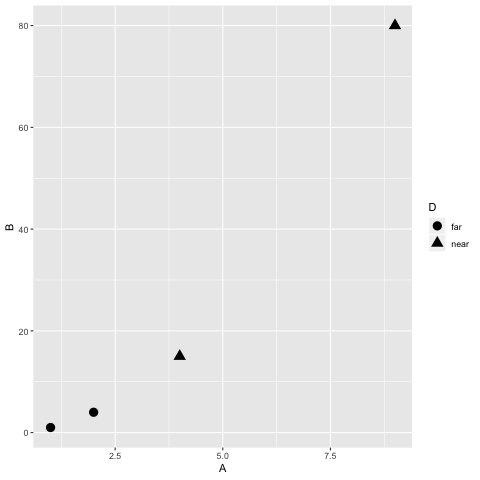

In [33]:
%%R
(ggplot(dfR) 
 + geom_point(
     aes(x = A,
         y = B, 
         shape = D), 
     size = 4))

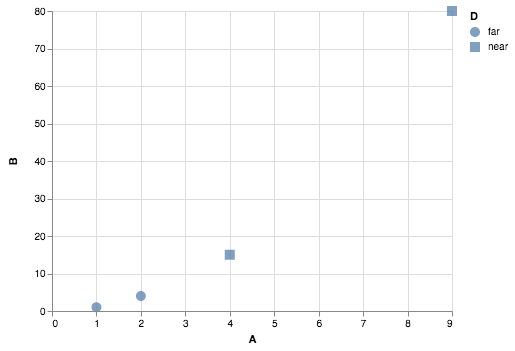

In [34]:
(alt.Chart(dfpy)
 .mark_point(size = 100,
             filled = True)
 .encode(x = 'A',
         y = 'B', 
         shape = 'D'))

#### Plot 2

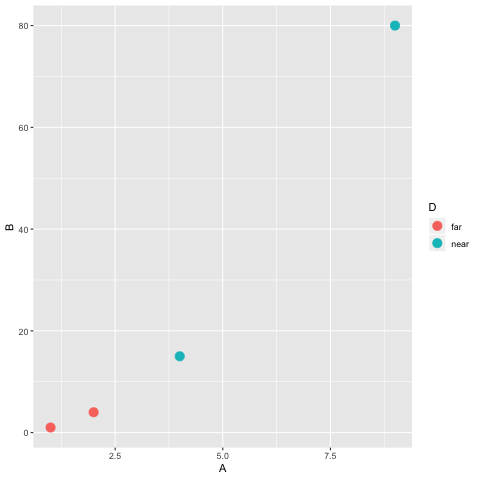

In [37]:
%%R
(ggplot(dfR) 
 + geom_point(
     aes(x = A,
         y = B, 
         color = D), 
     size = 4))

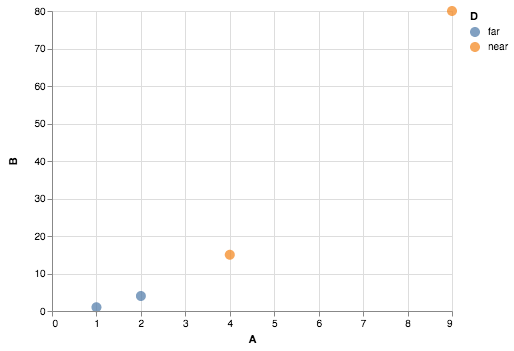

In [38]:
(alt.Chart(dfpy)
 .mark_point(size = 100,
             filled = True)
 .encode(x = 'A',
         y = 'B', 
         color = 'D'))

#### Plot 3

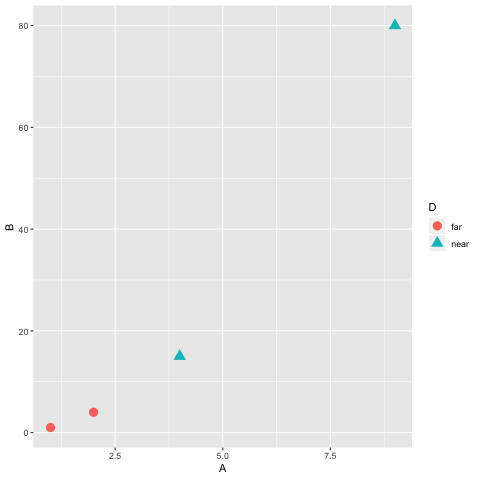

In [41]:
%%R
(ggplot(dfR) 
 + geom_point(
     aes(x = A,
         y = B, 
         shape = D,
         color = D), 
     size = 4))

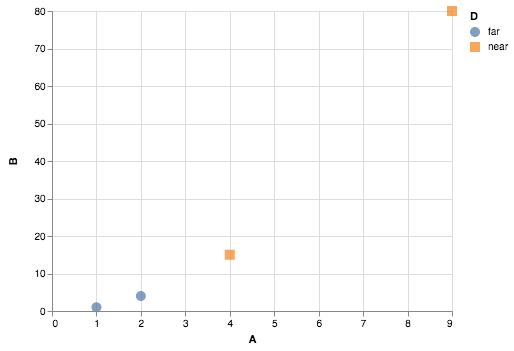

In [42]:
(alt.Chart(dfpy)
 .mark_point(size = 100,
             filled = True)
 .encode(x = 'A',
         y = 'B', 
         color = 'D',
         shape = 'D'))

#### Plot 4

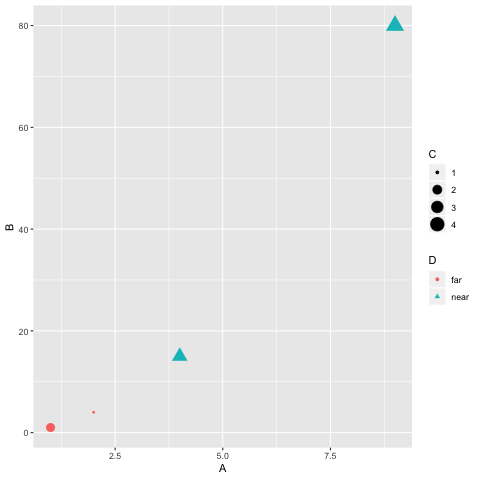

In [43]:
%%R
(ggplot(dfR) 
 + geom_point(
     aes(x = A,
         y = B, 
         shape = D,
         color = D,
         size = C)))

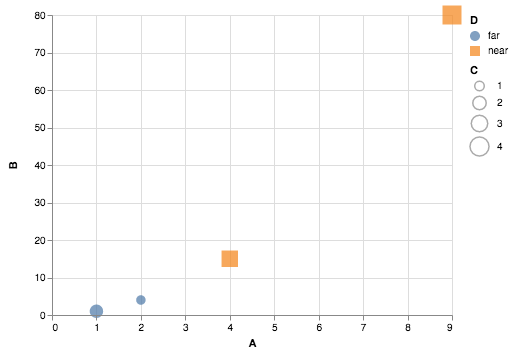

In [44]:
(alt.Chart(dfpy)
 .mark_point(filled = True)
 .encode(x = 'A',
         y = 'B', 
         color = 'D',
         shape = 'D',
         size = 'C'))

Note some interesting concepts illustrated here:

* *Continuous* (numeric, quantitative) variables should be mapped using **size** or **color** scales; these are the scales that can encode quantity.
* *Discrete* (categorical) variables should be mapped with **shape** or **color** scales; these are the scales that are best used for indicating "categories."  

## Layers

A very important aspect of the `ggplot2` package is the idea of *layers*.  Aesthetic mappings to different geoms can take place simply by specifying additional mappings with a `+` sign.  For example, suppose we want to create the above scatterplots with points *and* lines.  This requires two aesthetic mappings: one from the data to the points geom, and one from the data to the lines geom.  We can see this in what follows.  Note that because both `geom_point()` and `geom_line()` rely on the same aesthetic mapping, we could simplify the code by specifiying the appropriate mapping in the initial `ggplot()` command. The following two lines of code are equivalent:

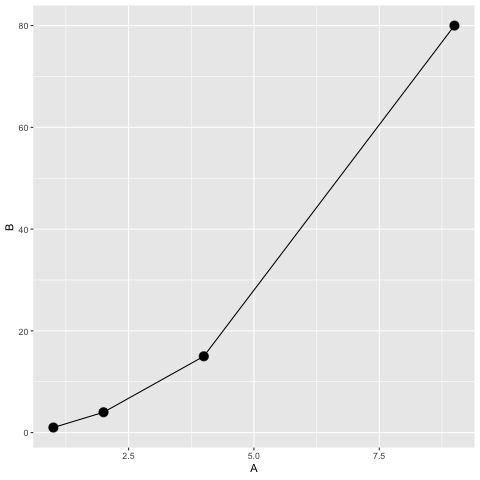

In [52]:
%%R
(ggplot(dfR) 
 + geom_point(aes(x = A,y = B), size = 4) 
 + geom_line(aes(x = A,y = B)))

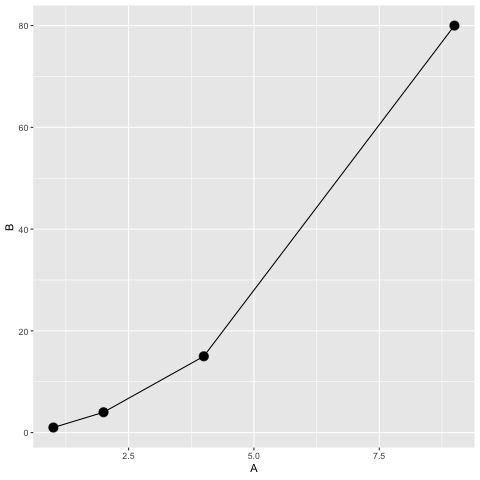

In [53]:
%%R
(ggplot(dfR, aes(x = A,y = B)) 
 + geom_point(size = 4) 
 + geom_line())

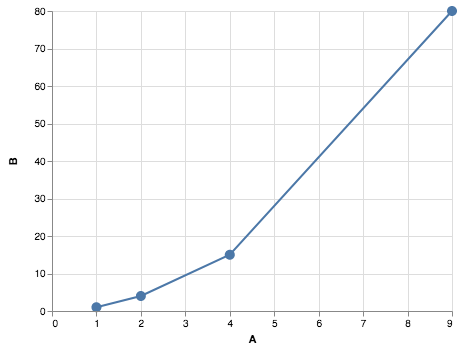

In [74]:
points = (alt.Chart(dfpy)
          .mark_point(size=100, 
                      filled=True, 
                      opacity=1)
          .encode(x='A',y='B'))
line = (alt.Chart(dfpy)
        .mark_line()
        .encode(x='A',y='B'))
line + points

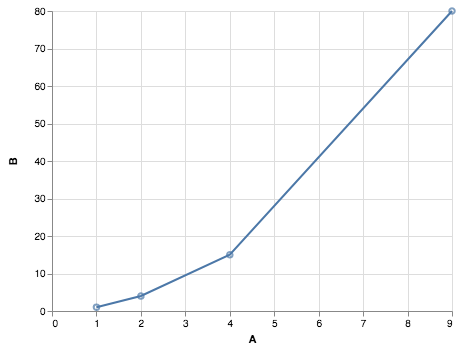

In [79]:
(alt.Chart(dfpy).mark_point().encode(x='A',y='B') 
+ alt.Chart(dfpy).mark_line().encode(x='A',y='B'))

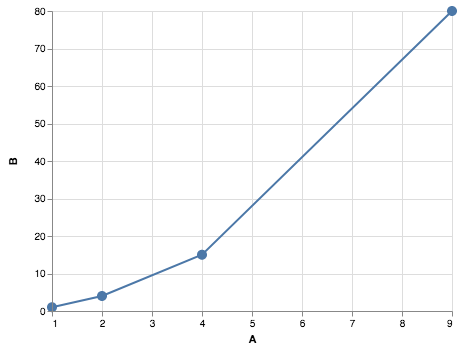

In [78]:
point_props = {'size':100,'filled':True,'opacity':1}

base = alt.Chart(dfpy).encode(x='A',y='B')

points = base.mark_point(**point_props)
line = base.mark_line()

line + points

## <font color="red"> Challenge 2 </font>

Re-create the following plots:

#### Plot 1

<img src="./img/challenge2_1.png" width=300/>

#### Plot 2

<img src="./img/challenge2_2.png" width=300/>

#### Plot 3

<img src="./img/challenge2_3.png" width=300/>

#### Plot 4

<img src="./img/challenge2_4.png" width=300/>

## <font color="blue"> Key </font>

#### Plot 1

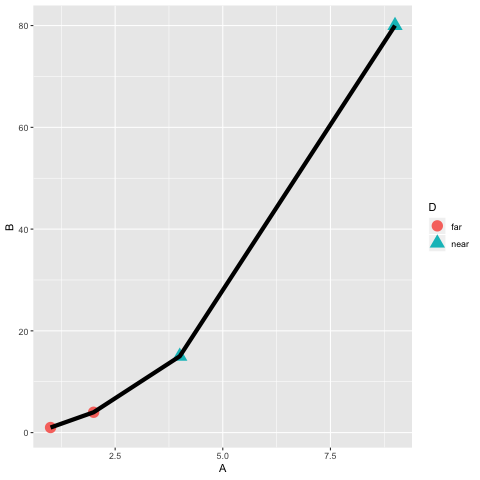

In [65]:
%%R
ggplot(dfR) + geom_point(aes(x = A,y=B,shape=D,color=D), size = 5) + geom_line(aes(x = A,y=B),size=2)

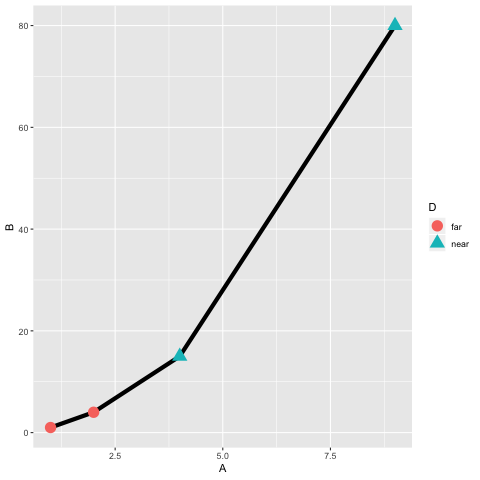

In [66]:
%%R
ggplot(dfR) +  geom_line(aes(x = A,y=B),size=2) + geom_point(aes(x = A,y=B,shape=D,color=D), size = 5)

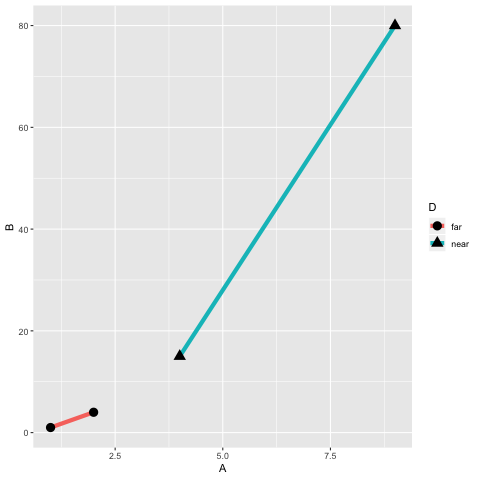

In [67]:
%%R
ggplot(dfR)  + geom_line(aes(x = A,y=B,color=D),size=2)+ geom_point(aes(x = A,y=B,shape=D), size = 4)

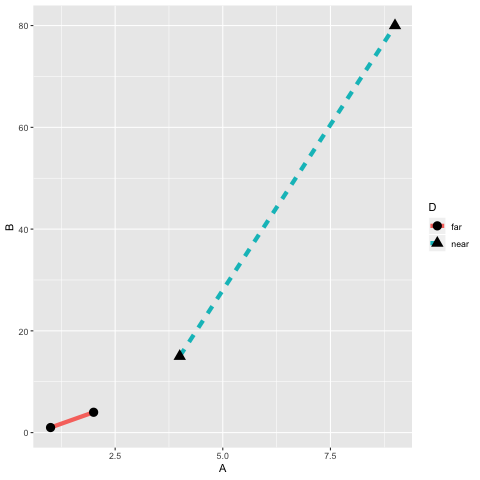

In [68]:
%%R
ggplot(dfR)  + geom_line(aes(x = A,y=B,linetype=D,color=D),size=2)+ geom_point(aes(x = A,y=B,shape=D), size = 4)